# Activity 3.3 Data Analysis using Python

#### Intended Learning Outcome

1. Perform descriptive and correlation analysis to  to analyze the dataset.
2. Interpret the results of descriptive and correlation analysis

# Analysis Using Descriptive Analytics

#### Resources:

* Personal Computer

* Jupyter Notebook

* Internet Connection

Perform the following tasks:

1. Gather a dataset regarding covid19 in the Philippines. Make sure that the dataset includes multiple variables.
2. Load the dataset into pandas dataframe.
3. Prepare the data by applying appropriate data preprocessing techniques. 
4. Analyze the data using descriptive analysis.
4. Perform correlation analysis.
5. Interpret the results based on the decriptive and correlation analysis

In [ ]:
from google.colab import drive
import datetime
import csv
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

In [6]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Module 3/Case_Information.csv')
data

Mounted at /content/drive


,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,C972617,35.0,35 to 39,Male,2020-05-15,NaN,NaN,For validation,NaN,Metropolitan Manila,Makati City,Mild,NaN,NaN,NaN,Metropolitan Manila
12087,C975669,37.0,35 to 39,Male,2020-05-15,NaN,2020-05-13,Died,2020-05-15,Davao del Sur,Davao City,Died,NaN,2020-04-29,NaN,Davao Region (Region XI)
12088,C980530,62.0,60 to 64,Female,2020-05-15,NaN,NaN,For validation,NaN,NaN,NaN,Mild,NaN,NaN,NaN,NaN
12089,C987431,18.0,15 to 19,Female,2020-05-15,NaN,NaN,Home quarantined,NaN,Samar,Tarangnan,Asymptomatic,Yes,NaN,No,Eastern Visayas (Region VIII)


In [7]:
# There only exists one column (age) that is not of object type.
# fill in missing values for age using the mean of existing age data
data['age'] = data['age'].fillna(data['age'].mean())
data.describe()


,age
count,12091.000000
mean,44.378708
std,18.218098
min,0.000000
25%,30.000000
50%,43.000000
75%,58.000000
max,101.000000


A minimum age of 0 will be considered patients that are below 1 year of age. The median is 43 years old.

In [8]:
# drop some columns and fill the in the missing values in the oolumns we want

# rows with NA in their pregnant column are Men, so replace the na with 'NO'
data['pregnant'] = data['pregnant'].fillna('No')

# rows with NA in the column of home_quarantined will be given the value of 
# the majority value, which is "Yes"
data['home_quarantined'] = data['home_quarantined'].fillna('Yes')


In [9]:
#Display Descriptive Statistics in Text

count = data['age'].count()
mean = data['age'].mean()
median = data['age'].median()
std = data['age'].std()
rng = data['age'].max() - data.age.min()
countstring = "There are {} records in the data.".format(count)
meanstring = 'The mean of the distribution is {} and the median is {}.'.format(mean, median)
stdstring = 'The standard deviation of the distribution is {}.'.format(std)
rangestring = 'The minimum value is {}, the maximum value is {}, and the range is {}.'.format(data.age.min(),data.age.max(),rng)

In [10]:
print(countstring)
print(meanstring)
print(stdstring)
print(rangestring)

There are 12091 records in the data.
The mean of the distribution is 44.37870753935376 and the median is 43.0.
The standard deviation of the distribution is 18.218097710474282.
The minimum value is 0.0, the maximum value is 101.0, and the range is 101.0.


In [11]:
data.dtypes

case_id                       object
age                          float64
age_group                     object
sex                           object
date_announced                object
date_recovered                object
date_of_death                 object
status                        object
date_announced_as_removed     object
province                      object
muni_city                     object
health_status                 object
home_quarantined              object
date_of_onset_of_symptoms     object
pregnant                      object
region                        object
dtype: object

In [12]:
# check for existing null values

data.isnull().sum()

case_id                          0
age                              0
age_group                       21
sex                              0
date_announced                   0
date_recovered               10854
date_of_death                11434
status                           0
date_announced_as_removed     8825
province                      1038
muni_city                     1038
health_status                    0
home_quarantined                 0
date_of_onset_of_symptoms     5530
pregnant                         0
region                        1038
dtype: int64

In [13]:
# Summarize variables to obtain statistical information
CountSex = data['sex'].value_counts()
data['sex'].value_counts(ascending=True)
print(CountSex)

#we can see that most of the patients that are infected with COVID are Male. Although the difference
# between male and female patient numbers is about 1000

Male      6521
Female    5570
Name: sex, dtype: int64


In [14]:
CountAge = data['age'].value_counts()
data['age'].value_counts(ascending=True)
print(CountAge)


# the mode (or the patient that is most occuring in terms of age)
# are patients who are aged 29. 


29.0     346
30.0     340
32.0     330
31.0     306
33.0     292
        ... 
96.0       3
92.0       3
95.0       2
97.0       1
101.0      1
Name: age, Length: 101, dtype: int64


In [15]:
# which region had the most amount of cases?


RegionCount = data['region'].value_counts()
data['region'].value_counts(ascending=True)
print(RegionCount)

# as expected. Metro Manila is the region in the Philippines that has the most amount
# of COVID cases. In fact the amount of cases it has is GREATER than all the cases
# from all the other regions COMBINED!!


Metropolitan Manila                            6873
Central Visayas (Region VII)                   1750
CALABARZON (Region IV-A)                       1327
Central Luzon (Region III)                      401
Davao Region (Region XI)                        191
Western Visayas (Region VI)                     102
Zamboanga Peninsula (Region IX)                 101
Ilocos Region (Region I)                         61
Bicol Region (Region V)                          59
Cordillera Administrative Region (CAR)           45
MIMAROPA (Region IV-B)                           35
Cagayan Valley (Region II)                       33
Eastern Visayas (Region VIII)                    24
Northern Mindanao (Region X)                     21
Autonomous Region of Muslim Mindanao (ARMM)      17
SOCCSKSARGEN (Region XII)                        10
Caraga (Region XIII)                              3
Name: region, dtype: int64


In [16]:
# we can create subDataframes to create more analysis
# we can seperate the dtagraph based on gender

MaleData = data[data['sex'] == 'Male']
MaleData


,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,Yes,2020-01-18,No,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,No,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,No,CALABARZON (Region IV-A)
6,C178743,39.0,35 to 39,Male,2020-03-08,2020-03-21,NaN,Recovered,2020-03-22,Metropolitan Manila,Makati City,Recovered,No,2020-03-03,No,Metropolitan Manila
7,C202135,58.0,55 to 59,Male,2020-03-08,NaN,NaN,Recovered,2020-03-25,Metropolitan Manila,Quezon City,Recovered,Yes,2020-02-20,No,Metropolitan Manila
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,C956141,31.0,30 to 34,Male,2020-05-15,NaN,NaN,For validation,NaN,NaN,NaN,Mild,Yes,NaN,No,NaN
12082,C960880,34.0,30 to 34,Male,2020-05-15,NaN,NaN,For validation,NaN,Metropolitan Manila,Pasay City,Mild,Yes,2020-05-05,No,Metropolitan Manila
12085,C971536,45.0,45 to 49,Male,2020-05-15,NaN,NaN,For validation,NaN,Zamboanga del Sur,Zamboanga City,Mild,Yes,2020-05-05,No,Zamboanga Peninsula (Region IX)
12086,C972617,35.0,35 to 39,Male,2020-05-15,NaN,NaN,For validation,NaN,Metropolitan Manila,Makati City,Mild,Yes,NaN,No,Metropolitan Manila


In [17]:
# What are the statuses of the males? 

for i in MaleData.health_status.unique():
  print(f'Males that have {i}: ' + str(MaleData[MaleData.health_status == i].shape[0]))

  #It seems most male patients have mild symptoms of the virus and some have recovered. 

Males that have Died: 523
Males that have Recovered: 1329
Males that have Mild: 4185
Males that have Severe: 31
Males that have Critical: 16
Males that have Asymptomatic: 437


# Analysis Using Correlation

In [19]:
data_2 = data.copy()
drop = [data_2.columns[0], 'age_group', 'province','muni_city', 'region']
data_2.drop(drop,axis =1, inplace = True)
data_2

,age,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant
0,38.0,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Recovered,Yes,2020-01-21,No
1,44.0,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Died,Yes,2020-01-18,No
2,60.0,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Recovered,No,2020-01-21,No
3,48.0,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Recovered,No,2020-03-03,No
4,62.0,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Died,No,2020-02-25,No
...,...,...,...,...,...,...,...,...,...,...,...
12086,35.0,Male,2020-05-15,NaN,NaN,For validation,NaN,Mild,Yes,NaN,No
12087,37.0,Male,2020-05-15,NaN,2020-05-13,Died,2020-05-15,Died,Yes,2020-04-29,No
12088,62.0,Female,2020-05-15,NaN,NaN,For validation,NaN,Mild,Yes,NaN,No
12089,18.0,Female,2020-05-15,NaN,NaN,Home quarantined,NaN,Asymptomatic,Yes,NaN,No


In [20]:
data_2.loc[data['sex'] == 'Male', 'pregnant'] = 'No'
data_2[['sex','pregnant']]

,sex,pregnant
0,Female,No
1,Male,No
2,Female,No
3,Male,No
4,Male,No
...,...,...
12086,Male,No
12087,Male,No
12088,Female,No
12089,Female,No


In [22]:
data_2['age'] = data_2['age'].fillna(data_2['age'].mean())
print(data_2.isnull().sum())
print("----------------------------------------------------")
drop3 = ['date_recovered', 'date_of_death', 'date_announced_as_removed','date_announced','date_of_onset_of_symptoms']
data3 = data_2.copy()
data3.drop(drop3,axis =1, inplace = True)
data3['pregnant'] = data3['pregnant'].fillna('No')
data3['home_quarantined'] = data3['home_quarantined'].fillna('Yes')
data3
print(data3.isnull().sum())

# we will be using data3 for correlation because we are working with a new type of correlation.
# Usually correlations are done for numerical values and not with categorical ones. Although we can
# use the Biserial Correlation for variables that have ONLY 2 options, and it certainly applies to 
# gender.... some of our variables like health_status have more than one solution. We will try to 
# use a correlation technique called "One-Hot Encoding". I purposely chose the variables in data3 because
# they do not contain too much categorical solutions. later on, I may attempt to include all the variables
# in the correlation.

age                              0
sex                              0
date_announced                   0
date_recovered               10854
date_of_death                11434
status                           0
date_announced_as_removed     8825
health_status                    0
home_quarantined                 0
date_of_onset_of_symptoms     5530
pregnant                         0
dtype: int64
----------------------------------------------------
age                 0
sex                 0
status              0
health_status       0
home_quarantined    0
pregnant            0
dtype: int64


In [36]:
# since dataset contains columns that are not continous and are
# categorical, the person method is not going to work.
# We can try to use one-hot encoding instead

data3_1 = pd.get_dummies(data3)

In [37]:
data3_1.corr()

,age,sex_Female,sex_Male,status_Admitted,status_Died,status_For validation,status_Home quarantined,status_Recovered,health_status_Asymptomatic,health_status_Critical,health_status_Died,health_status_Mild,health_status_Recovered,health_status_Severe,home_quarantined_No,home_quarantined_Yes,pregnant_No,pregnant_Yes
age,1.000000,-0.029140,0.029140,0.100009,0.282895,-0.221033,-0.061956,0.058212,-0.077535,0.042630,0.282895,-0.161351,0.058212,0.036191,0.211021,-0.211021,0.052004,-0.052004
sex_Female,-0.029140,1.000000,-1.000000,0.012051,-0.058740,-0.007406,0.047290,-0.000930,0.052316,-0.009193,-0.058740,0.003237,-0.000930,-0.004669,-0.038164,0.038164,-0.080160,0.080160
sex_Male,0.029140,-1.000000,1.000000,-0.012051,0.058740,0.007406,-0.047290,0.000930,-0.052316,0.009193,0.058740,-0.003237,0.000930,0.004669,0.038164,-0.038164,0.080160,-0.080160
status_Admitted,0.100009,0.012051,-0.012051,1.000000,-0.110746,-0.397235,-0.141527,-0.209433,0.081814,0.094399,-0.110746,0.159258,-0.209433,0.137081,0.436073,-0.436073,-0.010561,0.010561
status_Died,0.282895,-0.058740,0.058740,-0.110746,1.000000,-0.256184,-0.091273,-0.135067,-0.078884,-0.012165,1.000000,-0.358825,-0.135067,-0.017900,0.195172,-0.195172,0.019799,-0.019799
status_For validation,-0.221033,-0.007406,0.007406,-0.397235,-0.256184,1.000000,-0.327388,-0.484469,-0.153066,-0.036344,-0.256184,0.638265,-0.484469,-0.054274,-0.393863,0.393863,0.021583,-0.021583
status_Home quarantined,-0.061956,0.047290,-0.047290,-0.141527,-0.091273,-0.327388,1.000000,-0.172607,0.416084,-0.009593,-0.091273,-0.040850,-0.172607,-0.010709,-0.147928,0.147928,-0.018738,0.018738
status_Recovered,0.058212,-0.000930,0.000930,-0.209433,-0.135067,-0.484469,-0.172607,1.000000,-0.149177,-0.023005,-0.135067,-0.678575,1.000000,-0.033851,0.097113,-0.097113,-0.015536,0.015536
health_status_Asymptomatic,-0.077535,0.052316,-0.052316,0.081814,-0.078884,-0.153066,0.416084,-0.149177,1.000000,-0.013436,-0.078884,-0.396311,-0.149177,-0.019770,-0.055184,0.055184,-0.036012,0.036012
health_status_Critical,0.042630,-0.009193,0.009193,0.094399,-0.012165,-0.036344,-0.009593,-0.023005,-0.013436,1.000000,-0.012165,-0.061116,-0.023005,-0.003049,0.070145,-0.070145,0.003372,-0.003372


In [39]:
!pip install dython
from dython import nominal

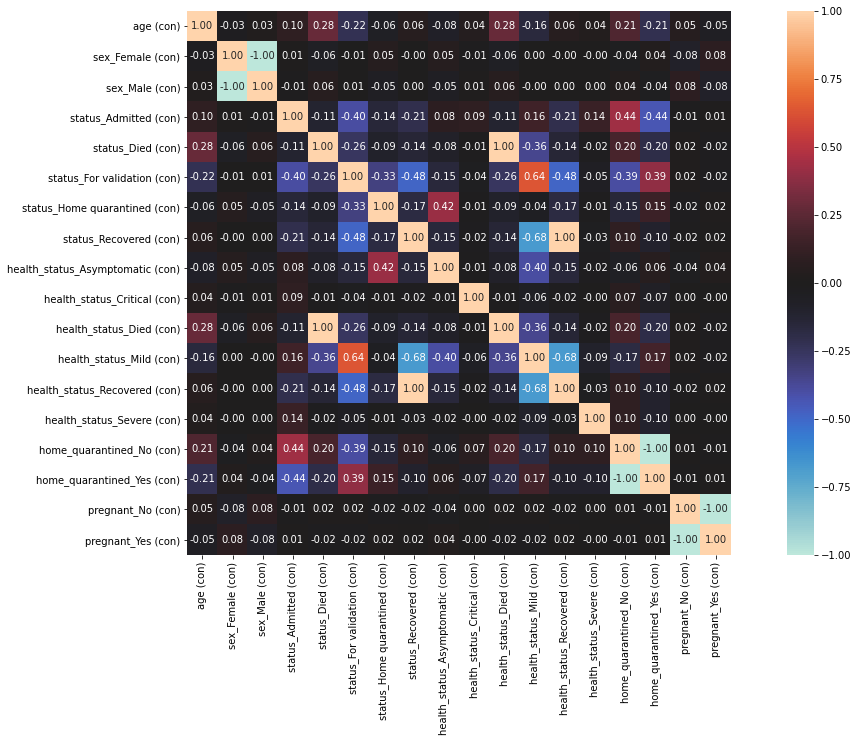

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f505584b850>,
 'corr':                                   age (con)  ...  pregnant_Yes (con)
 age (con)                          1.000000  ...           -0.052004
 sex_Female (con)                  -0.029140  ...            0.080160
 sex_Male (con)                     0.029140  ...           -0.080160
 status_Admitted (con)              0.100009  ...            0.010561
 status_Died (con)                  0.282895  ...           -0.019799
 status_For validation (con)       -0.221033  ...           -0.021583
 status_Home quarantined (con)     -0.061956  ...            0.018738
 status_Recovered (con)             0.058212  ...            0.015536
 health_status_Asymptomatic (con)  -0.077535  ...            0.036012
 health_status_Critical (con)       0.042630  ...           -0.003372
 health_status_Died (con)           0.282895  ...           -0.019799
 health_status_Mild (con)          -0.161351  ...           -0.022147
 health_status_R

In [44]:
nominal.associations(data3_1, figsize=(20,10), mark_columns= True)

# Conclusion

This exercis was extremely difficult for me as the data that was used (and most viably available) contained columns that are categorical instead of numerical. I don't feel confident in the process of one-hot encoding and using a correlation and correlation heat-map to see if each specific category has any relation ship with all the different values in the columns. Although I will say that some of the positive correlations do make some sense. 